# Shelter Animal Outcomes Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
train_file = "train.csv"
with open( train_file, "rb" ) as header_file:
    headers = header_file.readline().strip().split(',')
new_headers = headers[2:4] + headers[5:]
print headers
train_df = pd.read_csv( train_file, sep = ',', usecols = new_headers )
train_df.head( 5 )

['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']


,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [8]:
# add imputation, wrengling

In [3]:
def age_to_days( str_age, set_nan_value = 0 ):
    if type( str_age ) is str:
        days = 0
        las = str_age.strip().split()
        if 'year' in las[1]:
            days = int( las[0] ) * 365
        elif 'week' in las[1]:
            days = int( las[0] ) * 7
        elif 'month' in las[1]:
            days = int( las[0] ) * 30
        elif 'day' in las[1]:
            days = int( las[0] )
        else:                
            raise ValueError( "'{}' is not in the type list".format(las[1]) )
        return days
    elif str_age is np.nan:
        return set_nan_value
    else:
        raise TypeError( "{} is not supported type".format(type( str_age )) )

In [4]:
atod = lambda x: age_to_days( x )
dtom = lambda x : x // 30
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].apply( atod )
train_df['AgeuponOutcome'] = train_df['AgeuponOutcome'].apply( dtom )
train_df.head(5)

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,12,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,12,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,24,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,0,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,24,Lhasa Apso/Miniature Poodle,Tan


In [5]:
# the age set length is reduced from 45 to 43 since typos and nan are removed 
print len( set( train_df['AgeuponOutcome'] ) )
print set( train_df['AgeuponOutcome'] )

32
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 146, 24, 158, 133, 36, 170, 48, 182, 60, 194, 73, 206, 85, 219, 97, 231, 109, 243, 121])


In [6]:
clc = train_df['Color'].value_counts( )
clca = clc[ clc > 10 ]
clcb = clc.value_counts()

clc_cnt = len( set( train_df[ 'Color' ] ) )
print clc_cnt

brd = train_df[ 'Breed' ]
brd = set( brd )
print len( brd )

366
1380


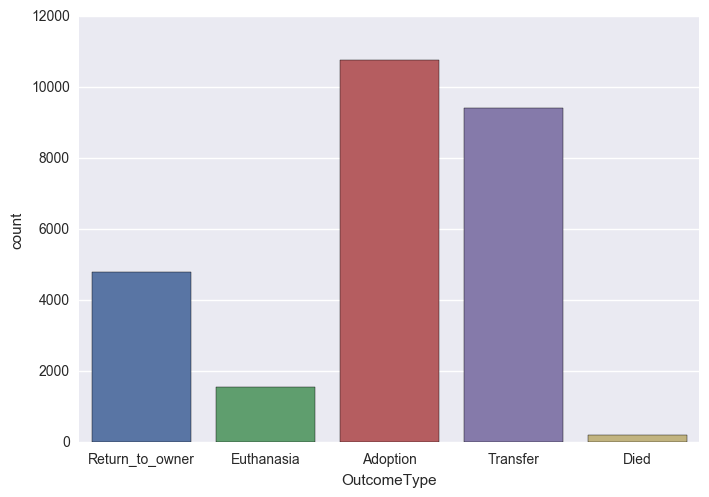

In [13]:
sns.countplot( train_df['OutcomeType'])
sns.plt.show()

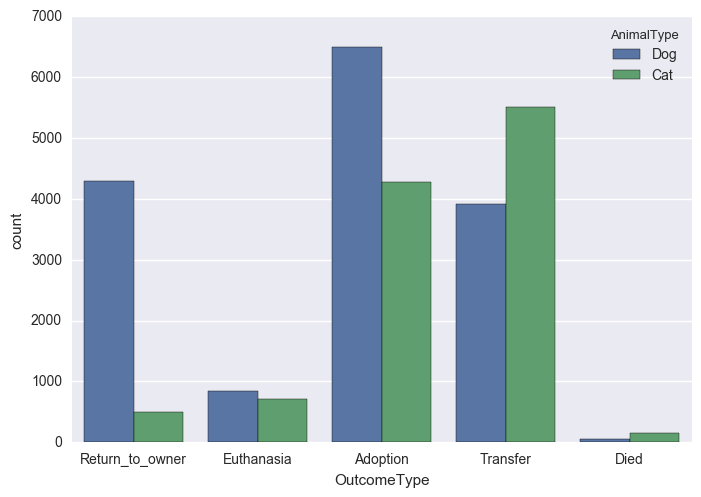

In [9]:
#sns.countplot( data = train_df, x = 'AnimalType', hue = 'OutcomeType')
sns.countplot( data = train_df, x = 'OutcomeType', hue = 'AnimalType' )
sns.plt.show()

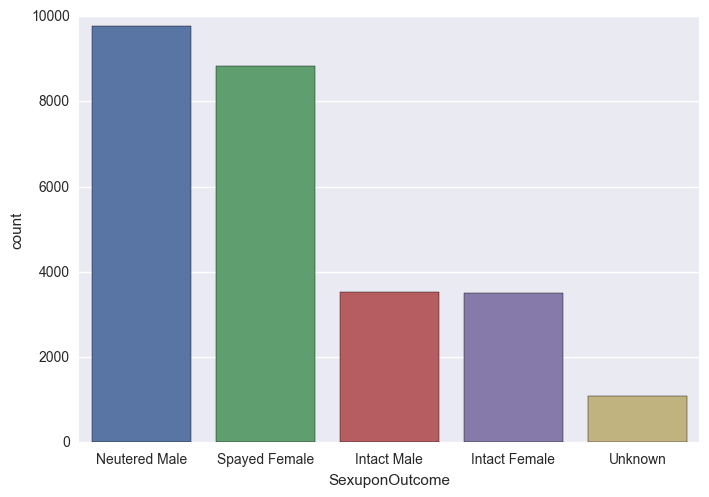

In [14]:
sns.countplot( train_df['SexuponOutcome'])
sns.plt.show()

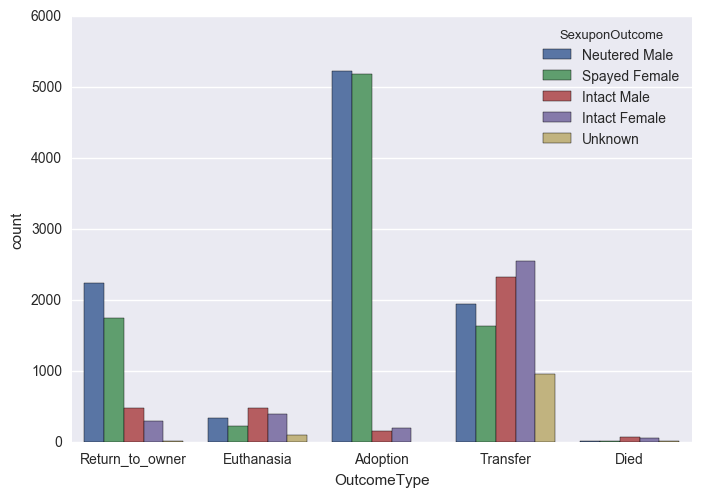

In [15]:
sns.countplot( data = train_df, x = 'OutcomeType', hue = 'SexuponOutcome')
sns.plt.show()

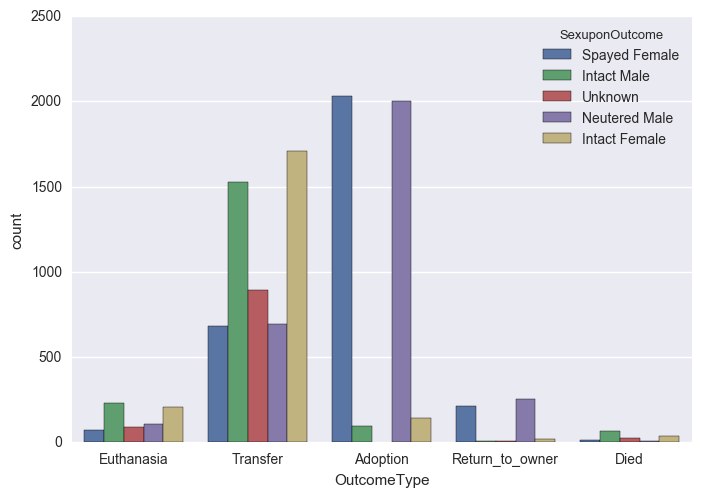

In [185]:
sns.countplot( data = train_df[ train_df[ 'AnimalType'] == 'Cat' ], x = 'OutcomeType', hue = 'SexuponOutcome')
sns.plt.show()

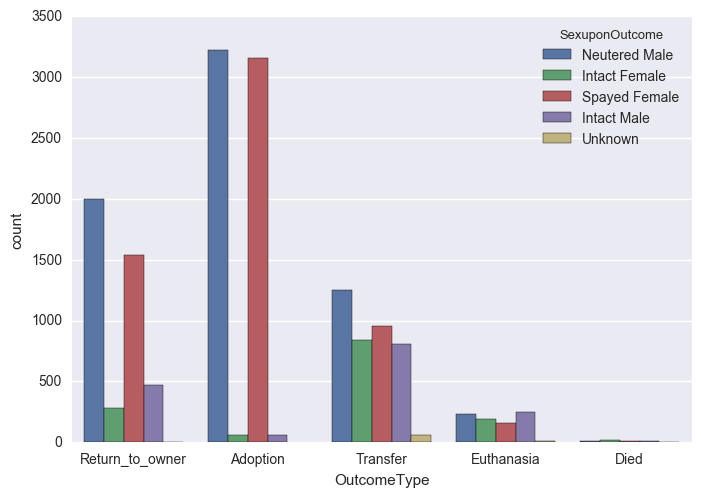

In [186]:
sns.countplot( data = train_df[ train_df[ 'AnimalType'] == 'Dog' ], x = 'OutcomeType', hue = 'SexuponOutcome')
sns.plt.show()

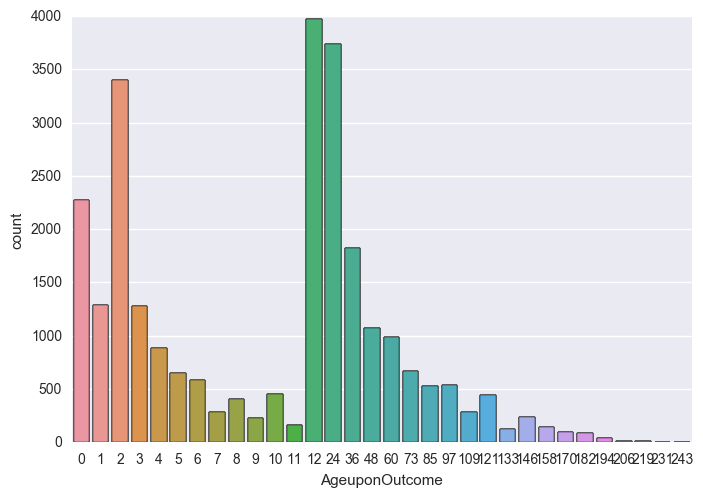

In [60]:
sns.countplot( train_df['AgeuponOutcome'] )
sns.plt.show()

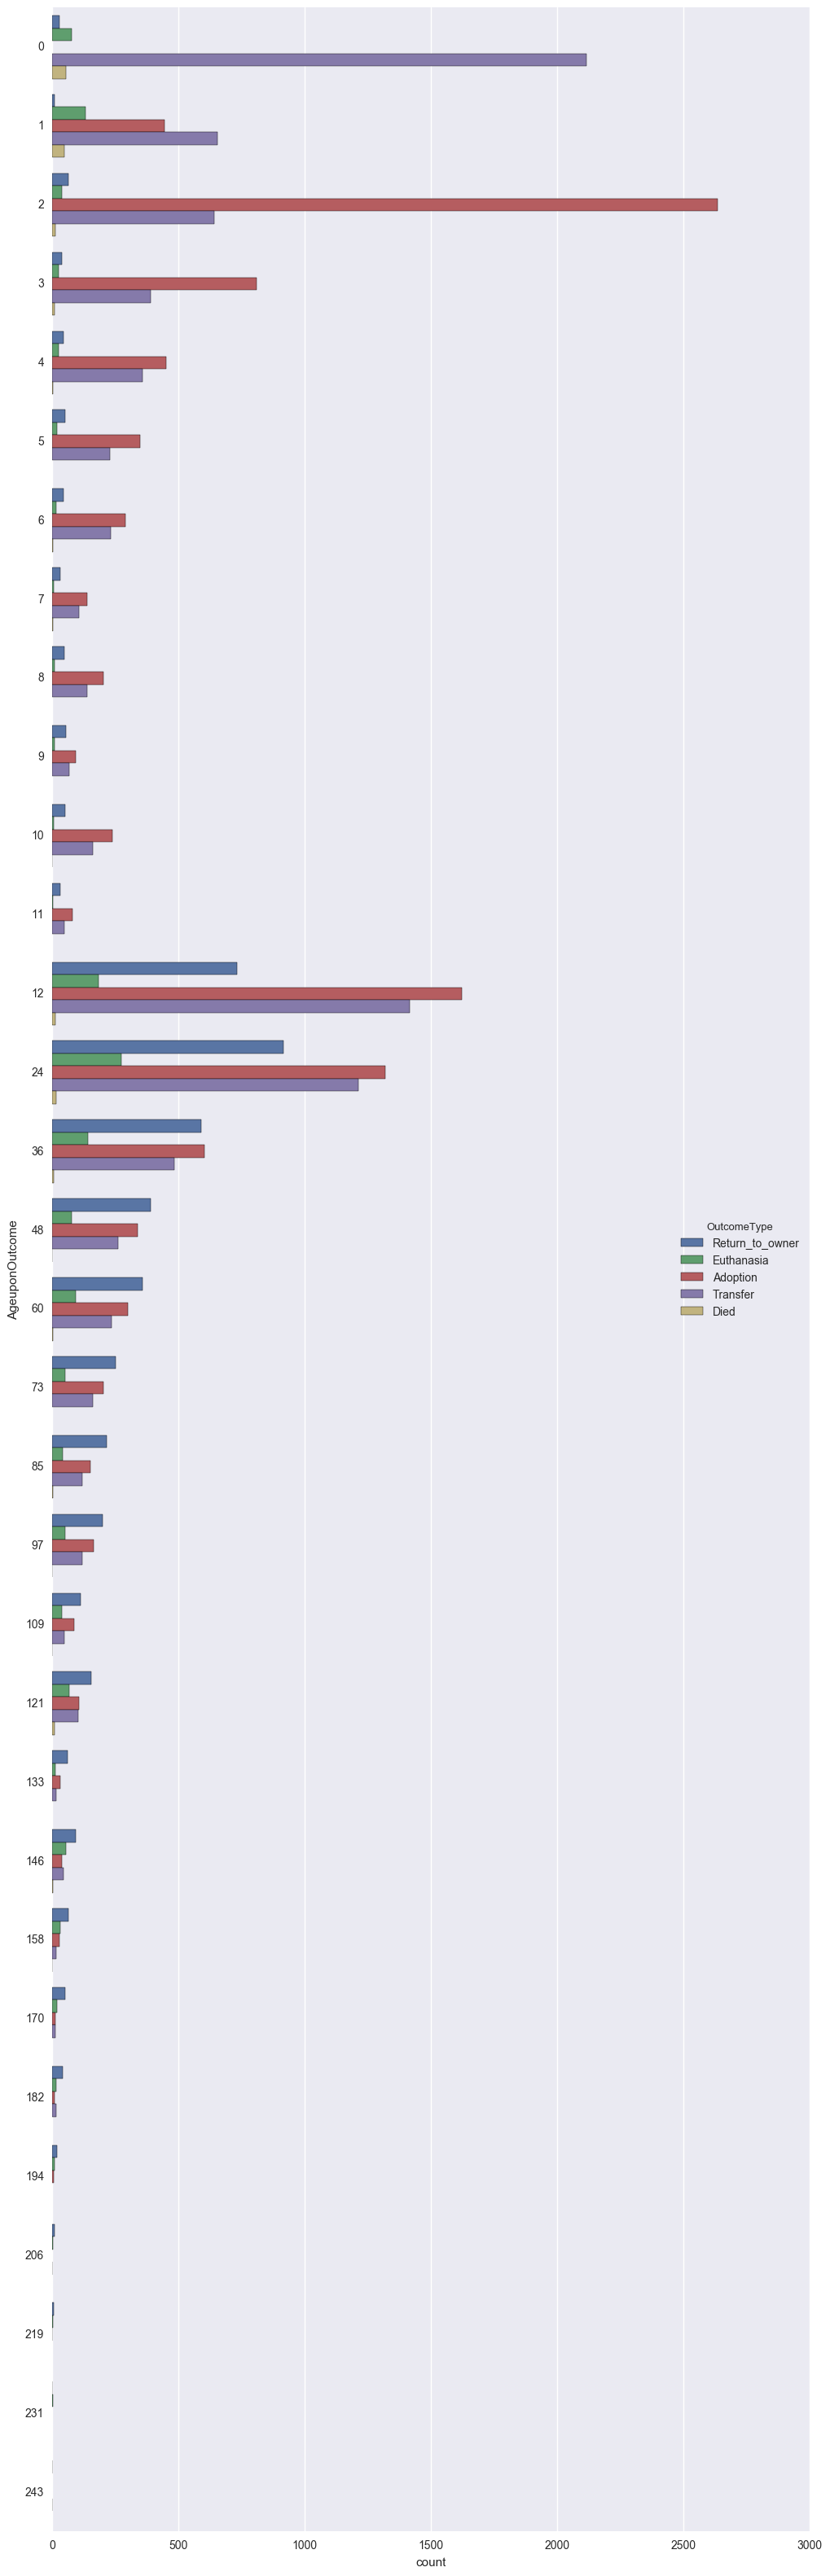

In [183]:
sns.countplot( data = train_df, hue = 'OutcomeType', y = 'AgeuponOutcome' ).figure.set_size_inches( 12, 40 )
sns.plt.show()

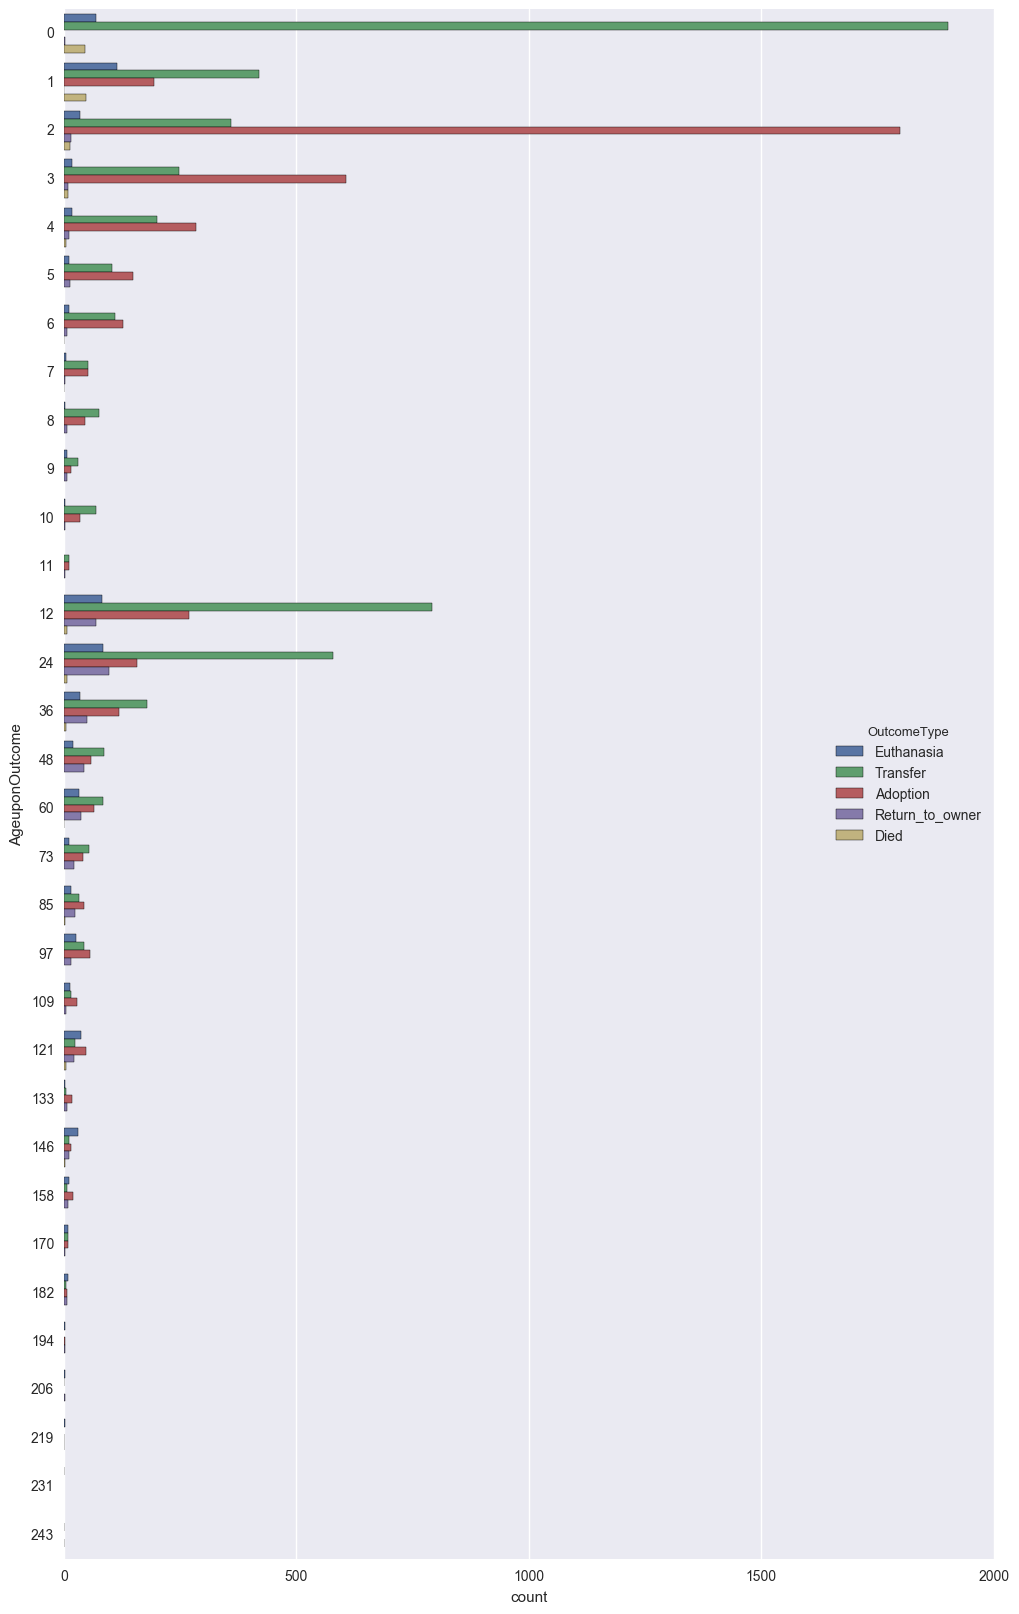

In [190]:
sns.countplot( data = train_df[train_df['AnimalType'] == 'Cat'], \
              hue = 'OutcomeType', y = 'AgeuponOutcome' ).figure.set_size_inches( 12, 20 )
sns.plt.show()

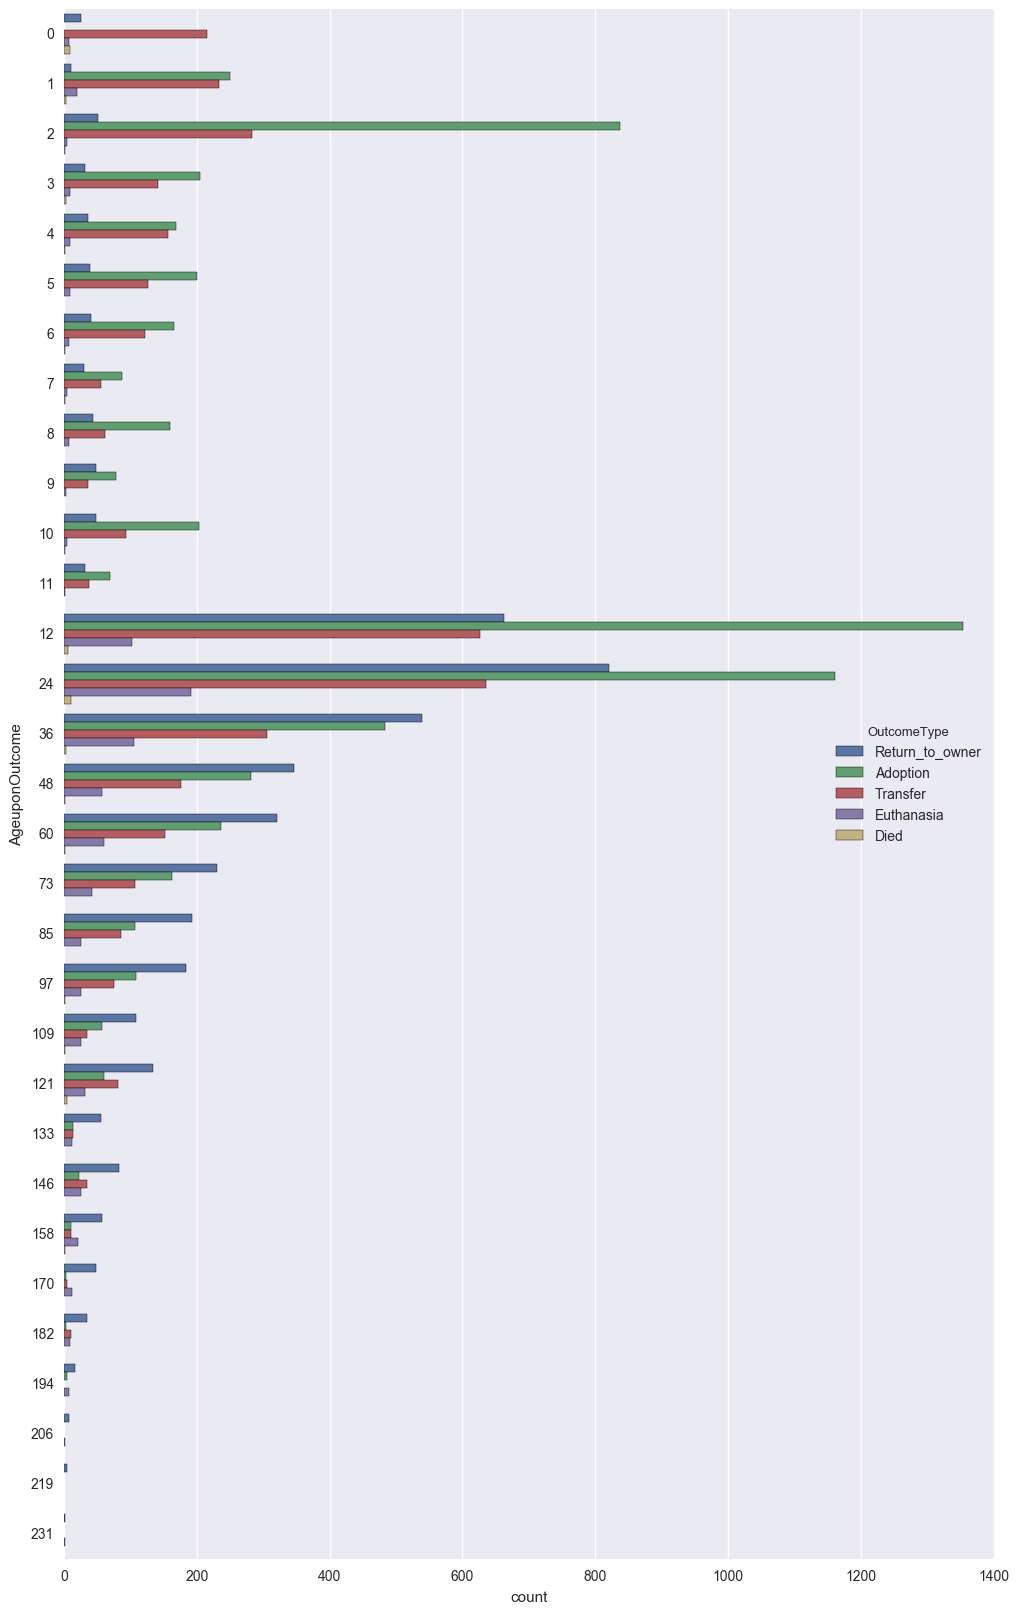

In [191]:
sns.countplot( data = train_df[train_df['AnimalType'] == 'Dog'], \
              hue = 'OutcomeType', y = 'AgeuponOutcome' ).figure.set_size_inches( 12, 20 )
sns.plt.show()

## Split data by outcome type

## Animal color visualization

In [117]:
adpt_df = train_df[ train_df[ 'OutcomeType' ] == 'Adoption' ]
died_df = train_df[ train_df[ 'OutcomeType' ] == 'Died' ]
ethn_df = train_df[ train_df[ 'OutcomeType' ] == 'Euthanasia' ]
rtn_df = train_df[ train_df[ 'OutcomeType' ] == 'Return_to_owner' ]
trns_df = train_df[ train_df[ 'OutcomeType' ] == 'Transfer' ]

df_list = [ adpt_df, died_df, ethn_df, rtn_df, trns_df ]
outcome_types = [ 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer' ]

In [118]:
for i in df_list:
    print len( i )

10769
197
1555
4786
9422


In [126]:
clr_split = lambda x : x.split( '/' )

def clr_cnt( clr_list ):
    clr_cnt_dict = {}
    for r in clr_list:
        for c in r:
            if c in clr_cnt_dict.keys():
                clr_cnt_dict[ c ] += 1
            else:
                clr_cnt_dict[ c ] = 1
                
    return clr_cnt_dict

In [125]:
clrlist_outcome = [ df['Color'].apply( clr_split ) for df in df_list ]
clrwrdcnt = [ clr_cnt( c ) for c in clrlist_outcome ]
clrwrdcnt_df = [ pd.DataFrame( data = { 'cnt' : c.values(), 'val' : c.keys() } ) for c in clrwrdcnt ]

for i, v in enumerate( clrwrdcnt ):
    print outcome_types[i], len( v ), sum( v.values())
    print v.items()
    print

Adoption 54 16585
[('Blue', 497), ('Blue Tabby', 286), ('Cream Tabby', 125), ('Liver Tick', 1), ('Flame Point', 44), ('Gray Tabby', 9), ('Brown Merle', 44), ('Torbie', 161), ('Black', 3145), ('Black Smoke', 44), ('Sable', 167), ('Orange', 26), ('Red Tick', 32), ('White', 5018), ('Seal Point', 64), ('Silver Tabby', 22), ('Red', 336), ('Buff', 147), ('Brown', 1276), ('Red Merle', 27), ('Blue Smoke', 3), ('Chocolate Point', 13), ('Chocolate', 202), ('Tortie Point', 15), ('Blue Merle', 85), ('Black Tiger', 1), ('Liver', 7), ('Yellow Brindle', 21), ('Black Brindle', 44), ('Lynx Point', 85), ('Calico', 221), ('Gray', 117), ('Agouti', 1), ('Black Tabby', 24), ('Tortie', 249), ('Apricot', 10), ('Lilac Point', 15), ('Blue Cream', 18), ('Ruddy', 1), ('Orange Tabby', 538), ('Blue Tick', 29), ('Blue Tiger', 5), ('Brown Tiger', 2), ('Brown Brindle', 356), ('Fawn', 69), ('Brown Tabby', 1022), ('Blue Point', 12), ('Gold', 21), ('Tricolor', 402), ('Calico Point', 11), ('Yellow', 80), ('Silver', 27), (

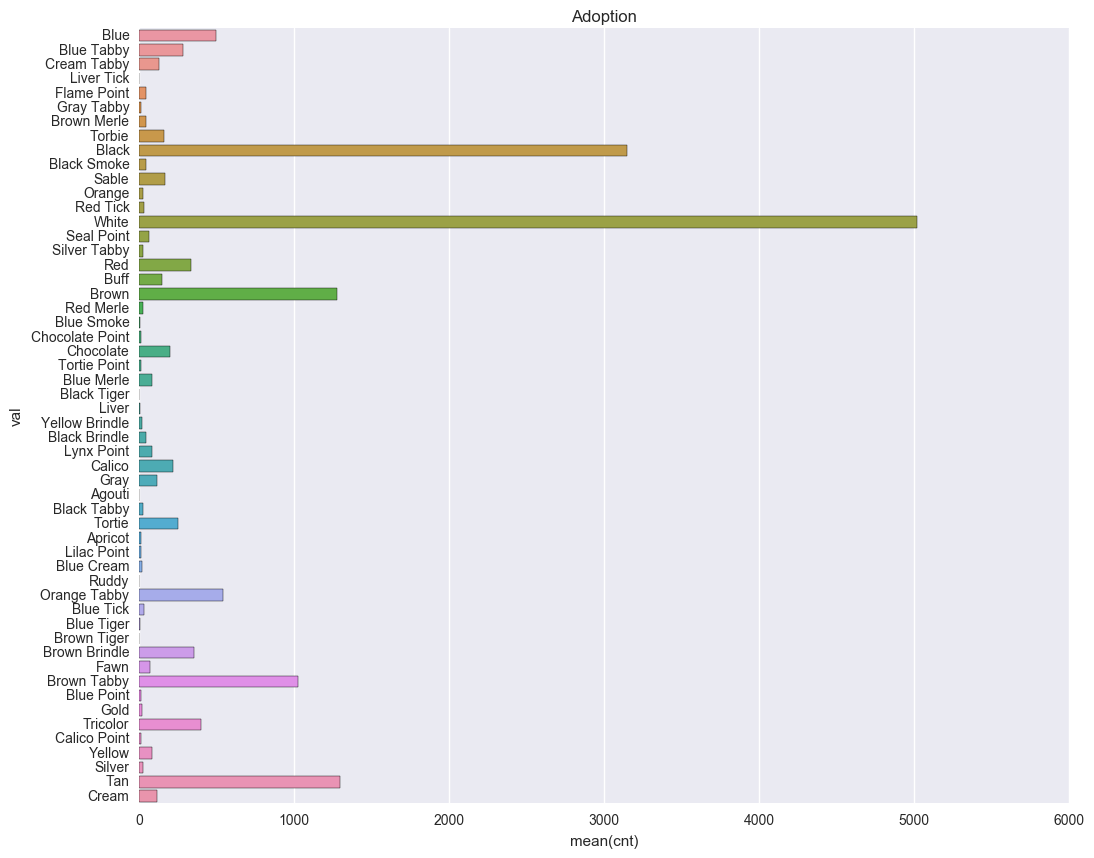

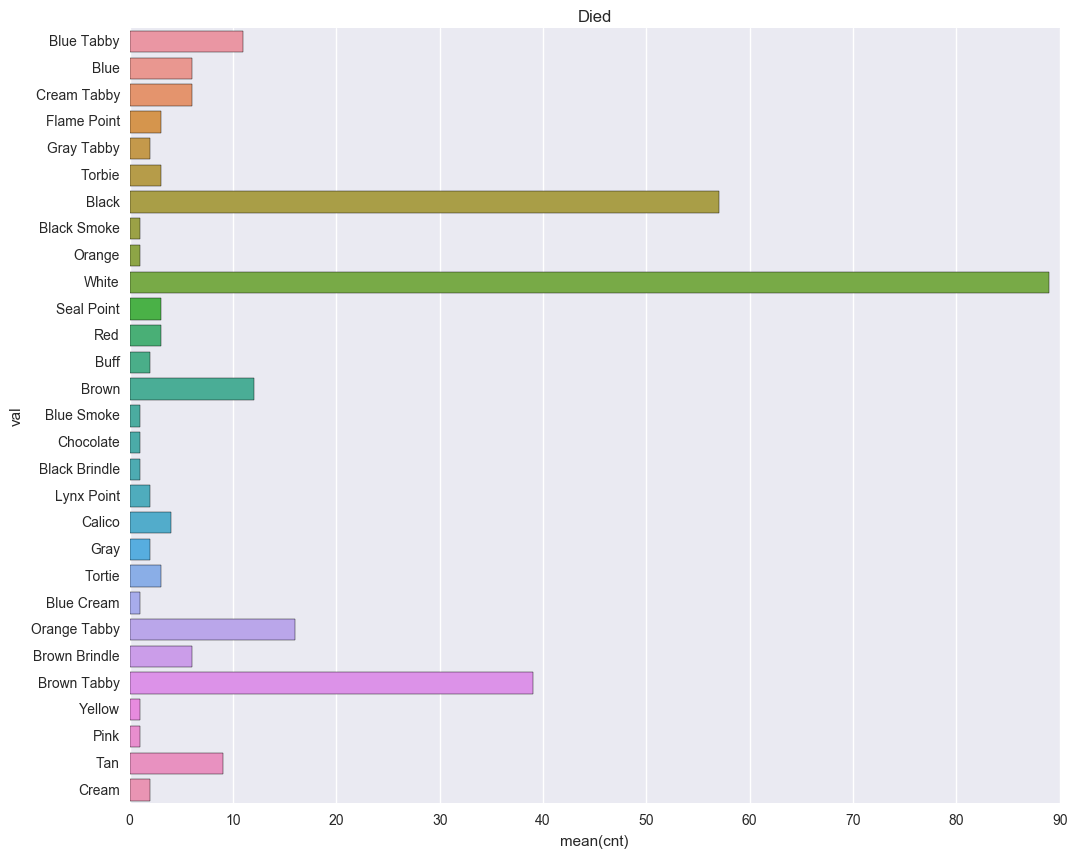

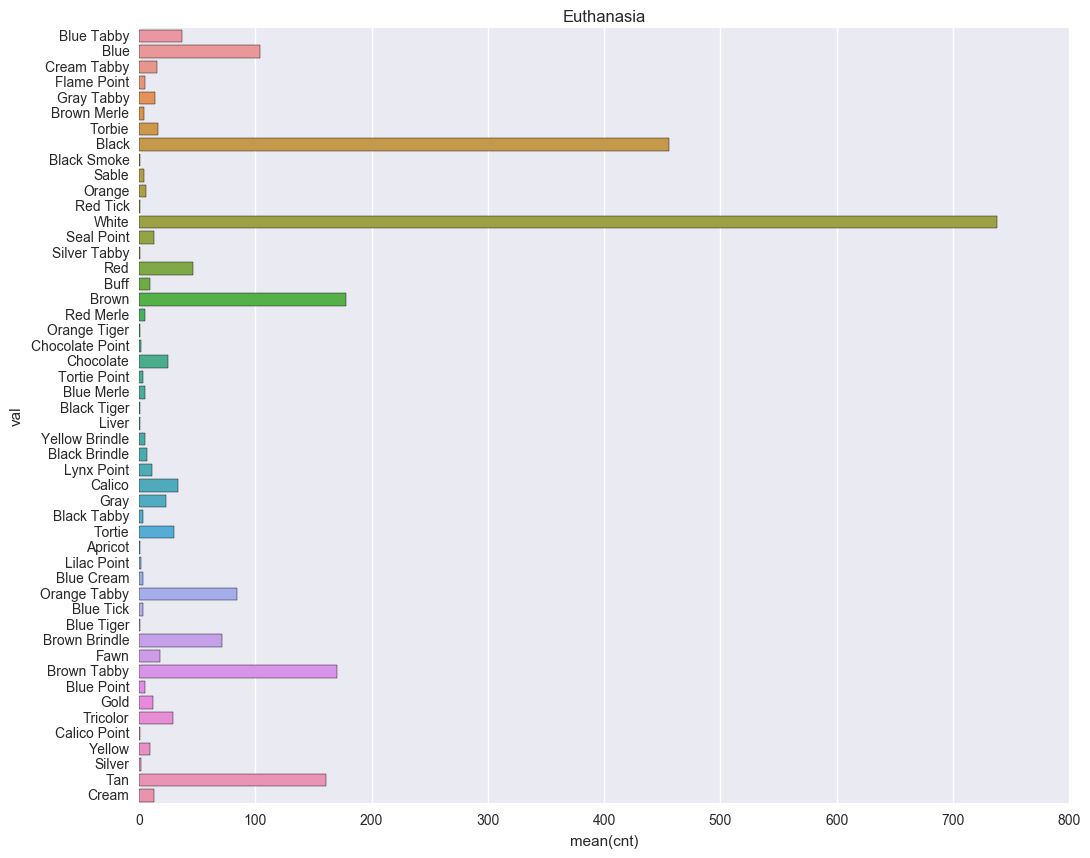

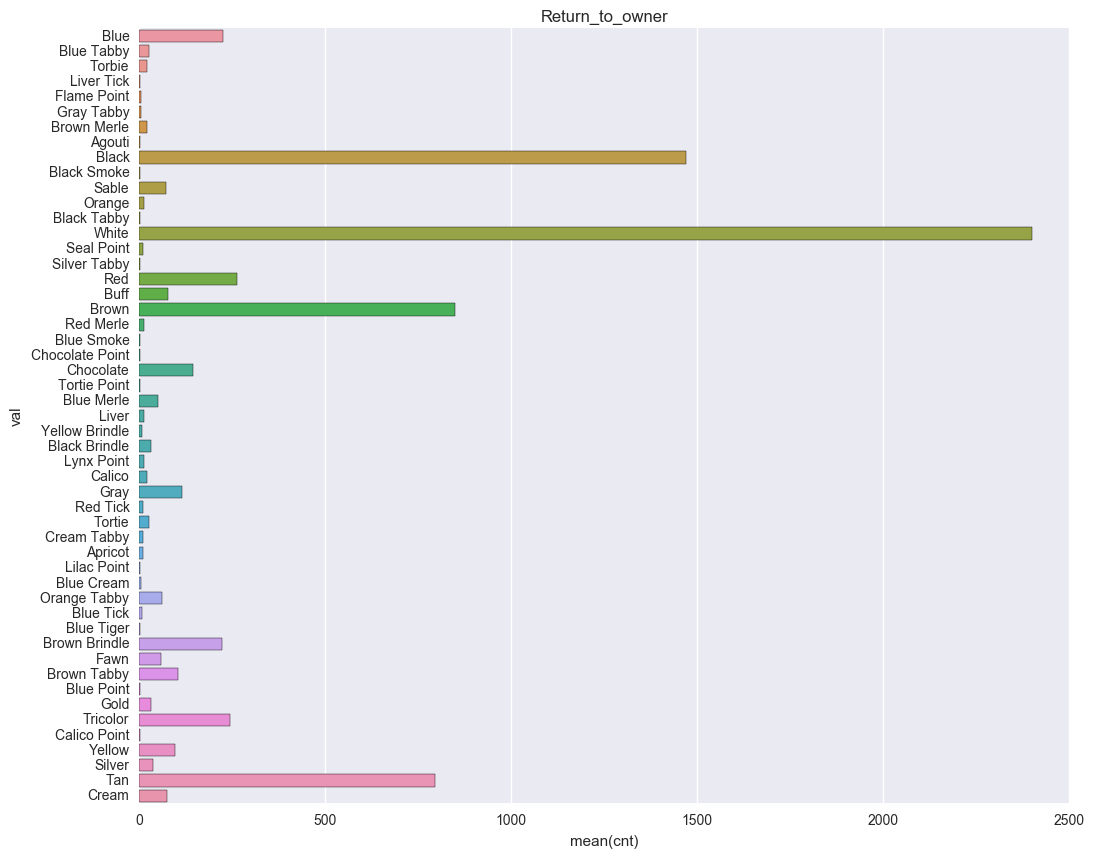

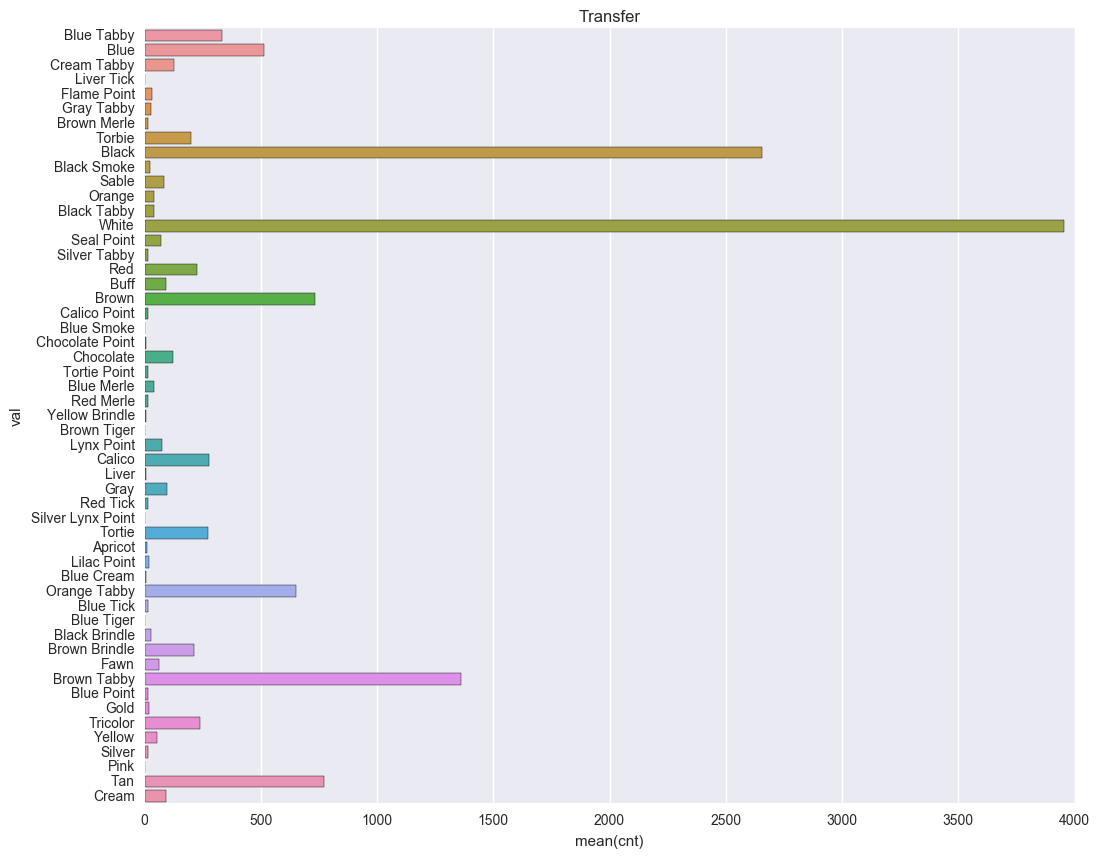

In [116]:
for i, df in enumerate( clrwrdcnt_df ):
    g = sns.barplot( data = df, x = 'cnt', y = 'val' )
    g.figure.set_size_inches( 12, 10 )
    g.set_title( outcome_types[i] )
    sns.plt.show()

## Breed visualization

In [167]:
import operator

brd_sep = lambda x: x.replace('Mix', '' ).strip().split('/')

brdlist_outcome = [ df['Breed'].apply( brd_sep ) for df in df_list ]
brdwrdcnt = [ clr_cnt( c ) for c in brdlist_outcome ]
sorted_brdcnt = [ sorted( c.items(), key = operator.itemgetter(1), reverse = True ) for c in brdwrdcnt ]

sorted_brdcnt_cnt = [ [ r[1] for r in s ] for s in sorted_brdcnt ]
sorted_brdcnt_val = [ [ r[0] for r in s ] for s in sorted_brdcnt ]

brdwrdcnt_df = \
[ pd.DataFrame( data = { 'cnt' : c, 'val' : v } ) for c, v in zip( sorted_brdcnt_cnt, sorted_brdcnt_val ) ]

In [171]:
for i, v in enumerate( sorted_brdcnt ):
    print outcome_types[i], len( v ), sum( [c[1] for c in v] )
    #sorted_brdcnt = sorted( v.items(), key=operator.itemgetter(1), reverse = True )
    #print sorted_brdcnt
    print

Adoption 201 12315

Died 35 206

Euthanasia 107 1682

Return_to_owner 184 5427

Transfer 184 10167



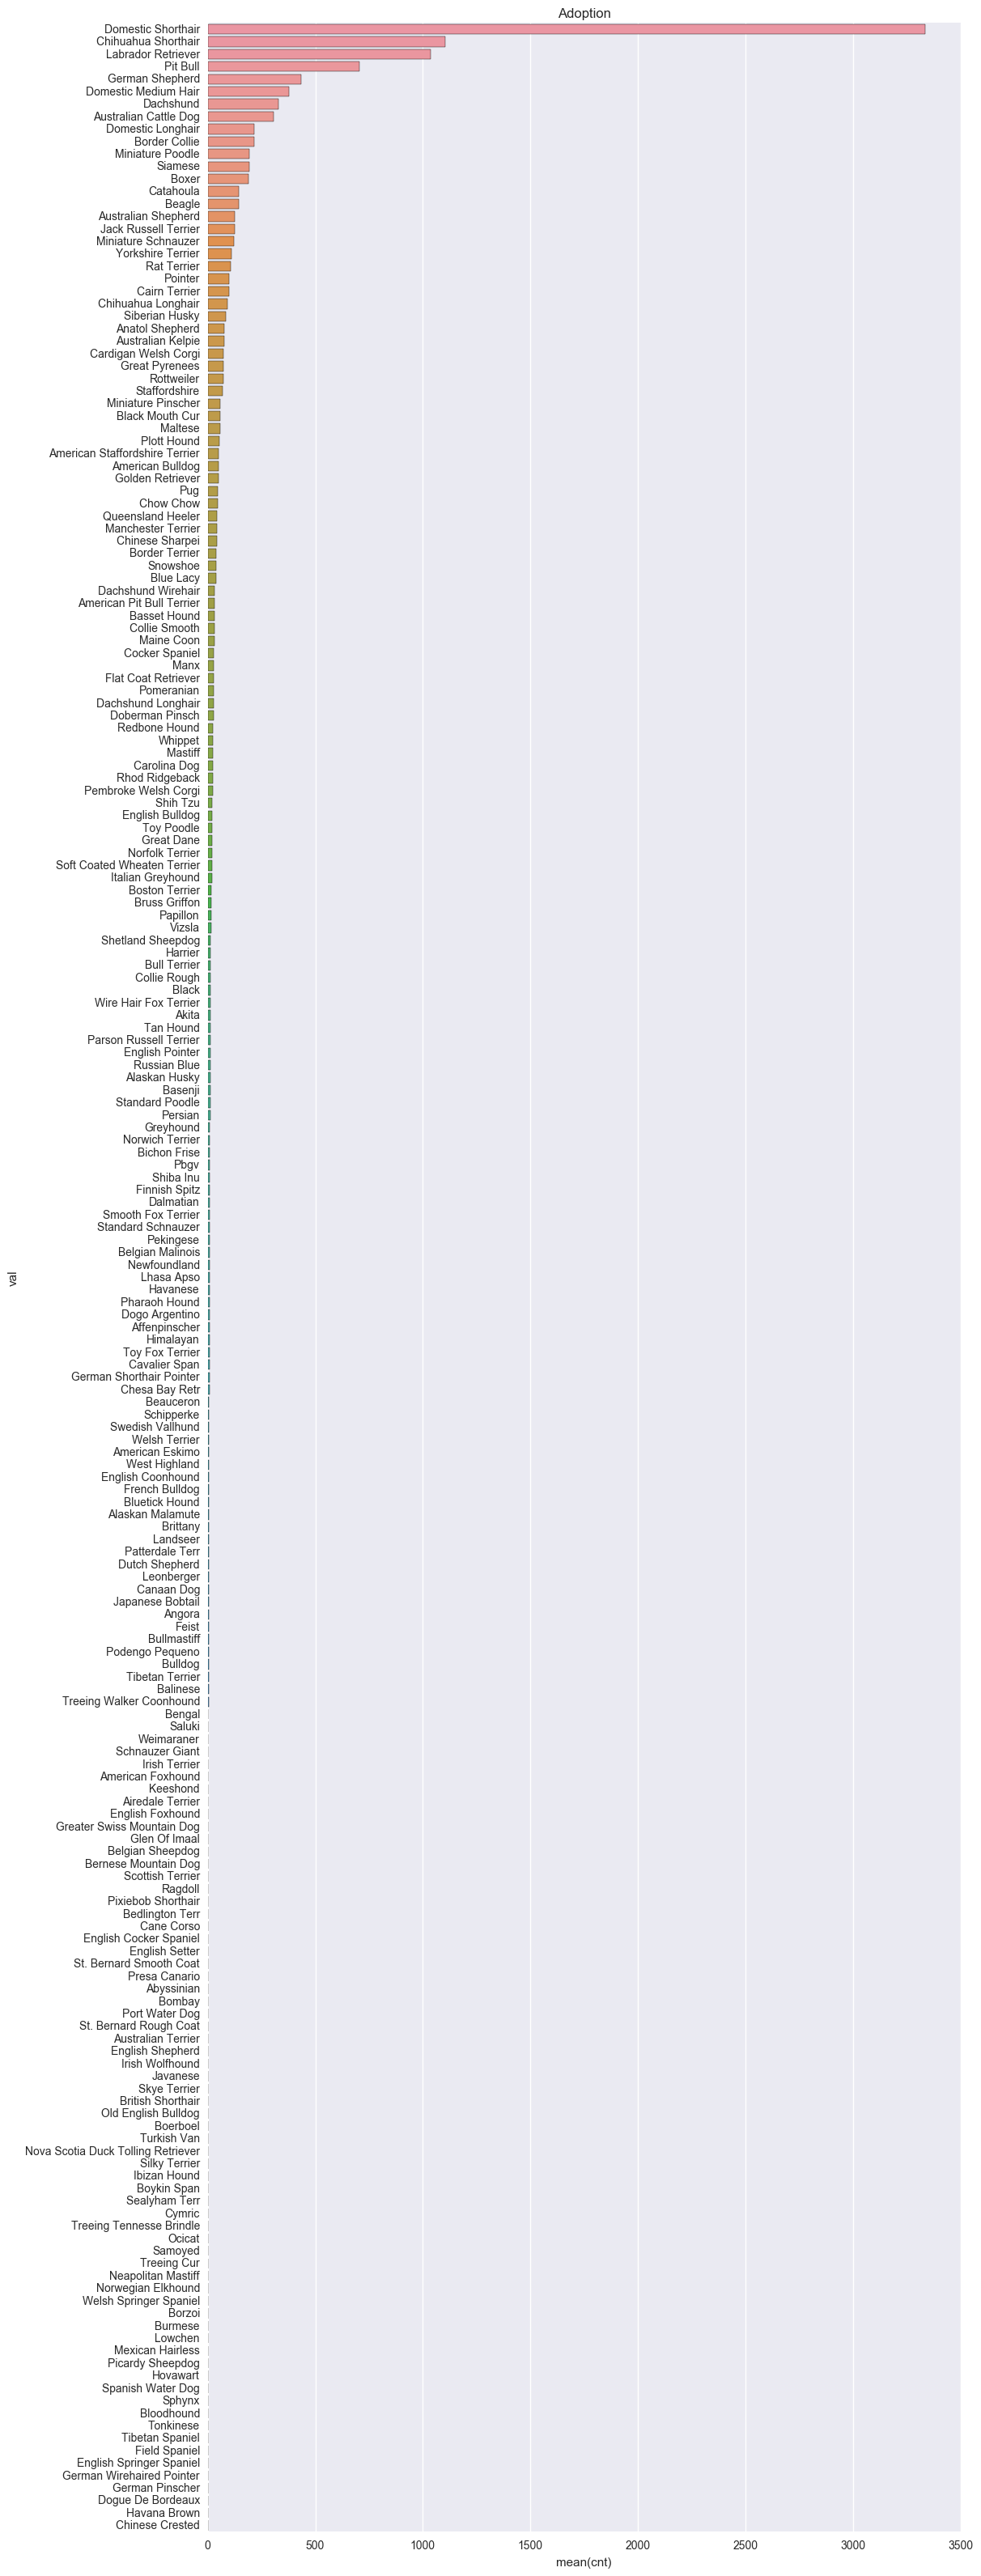

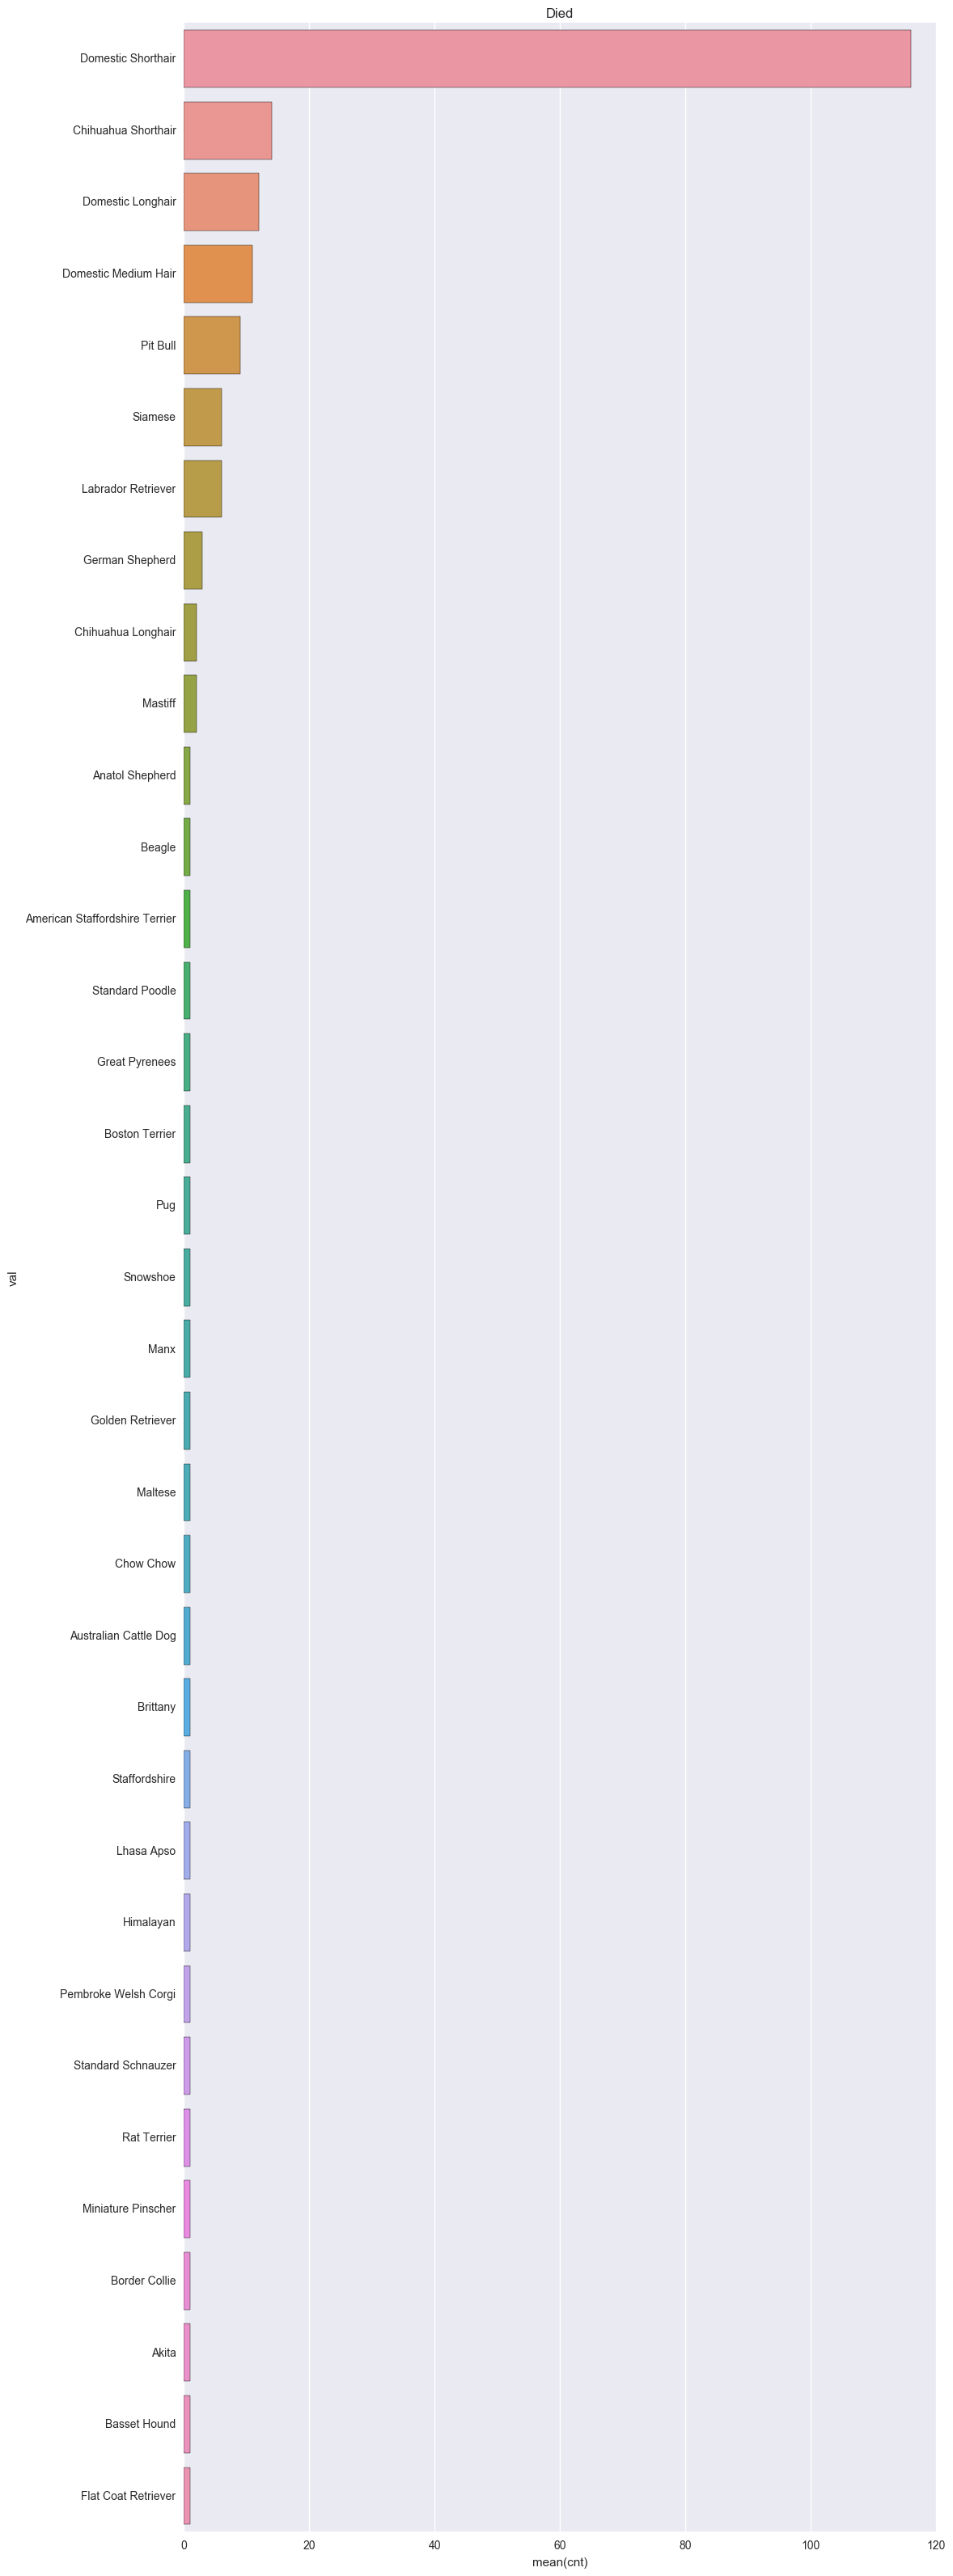

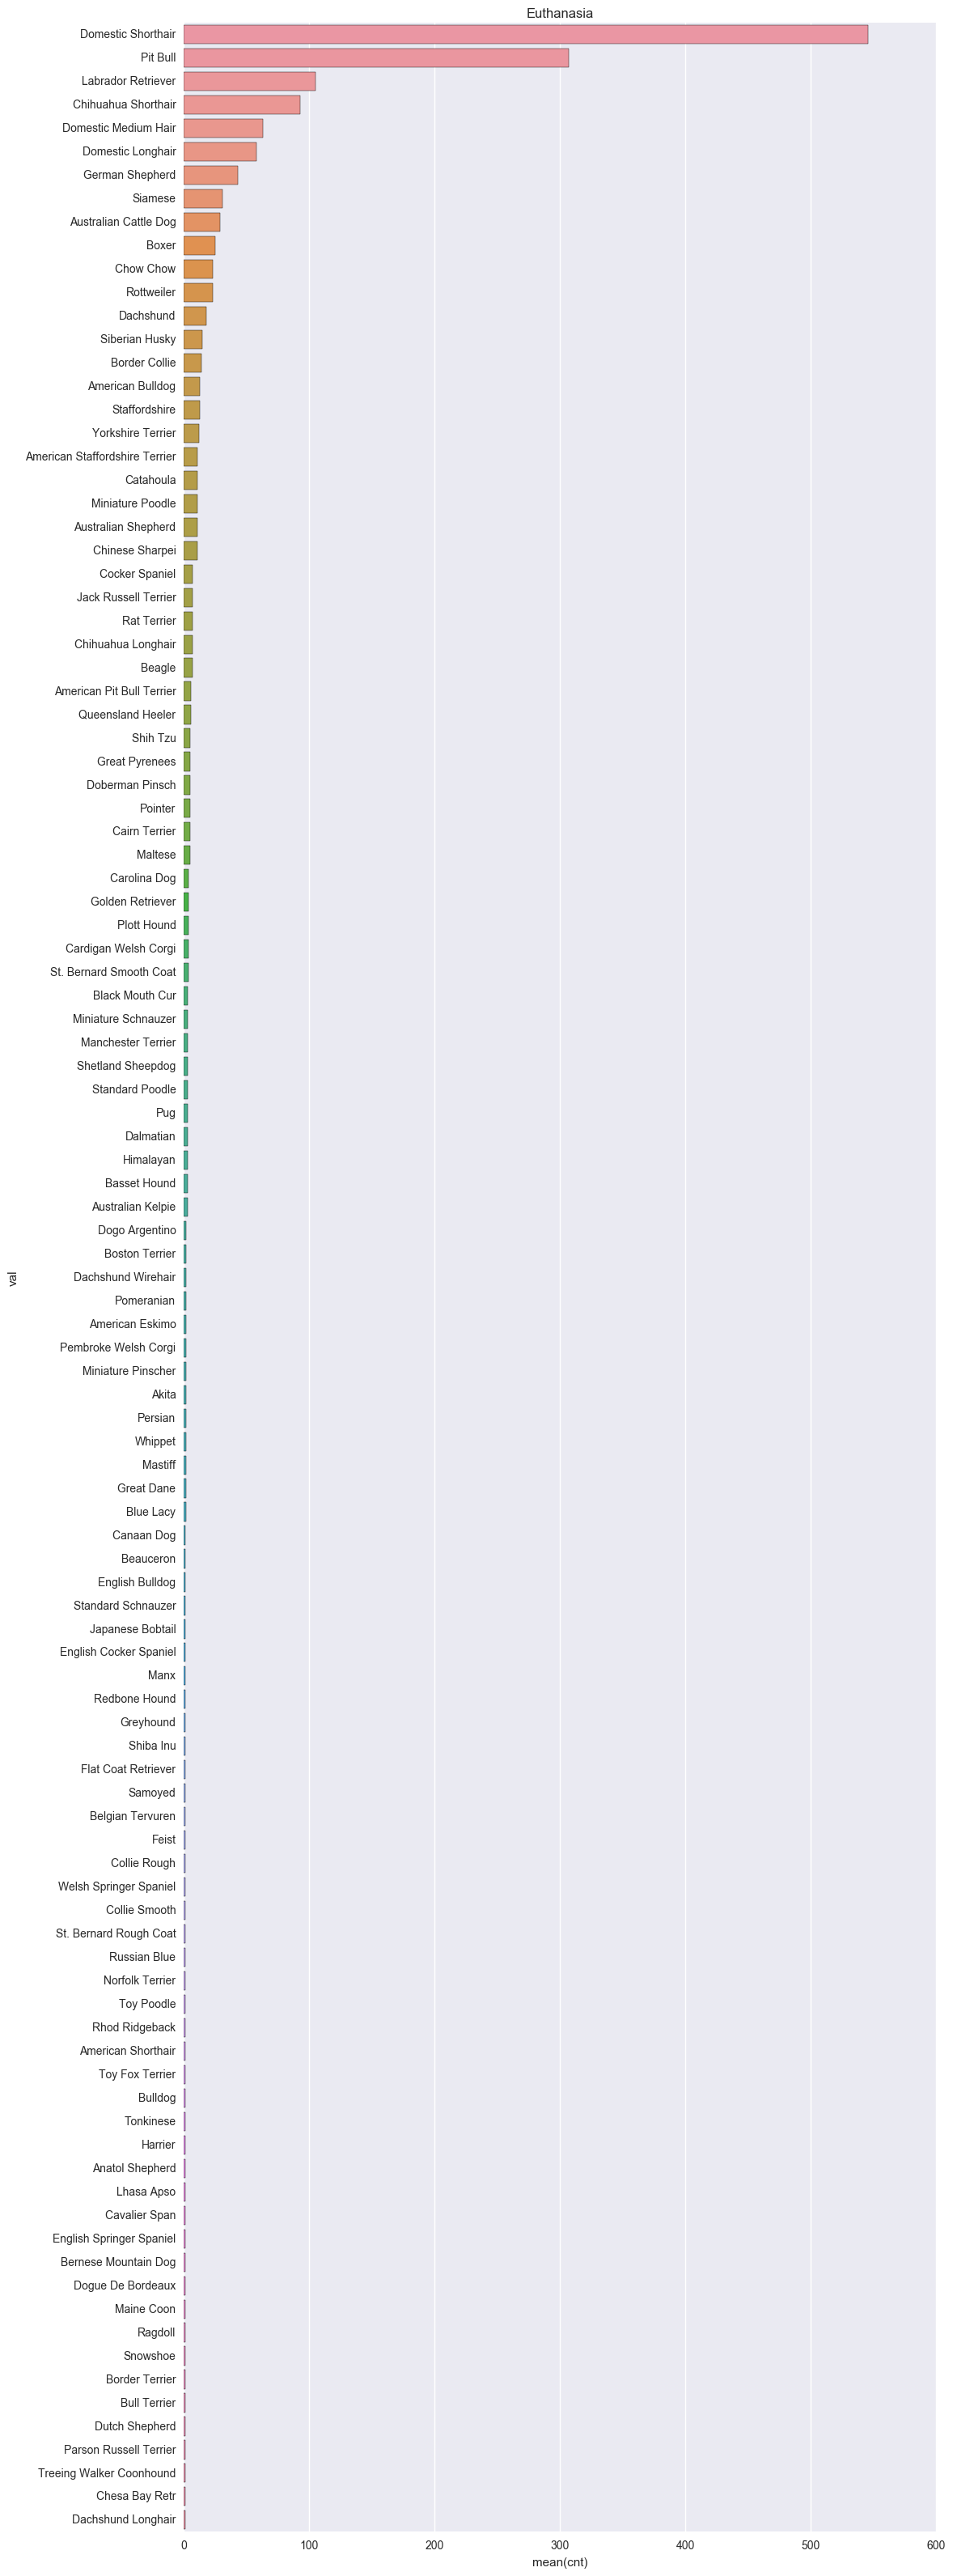

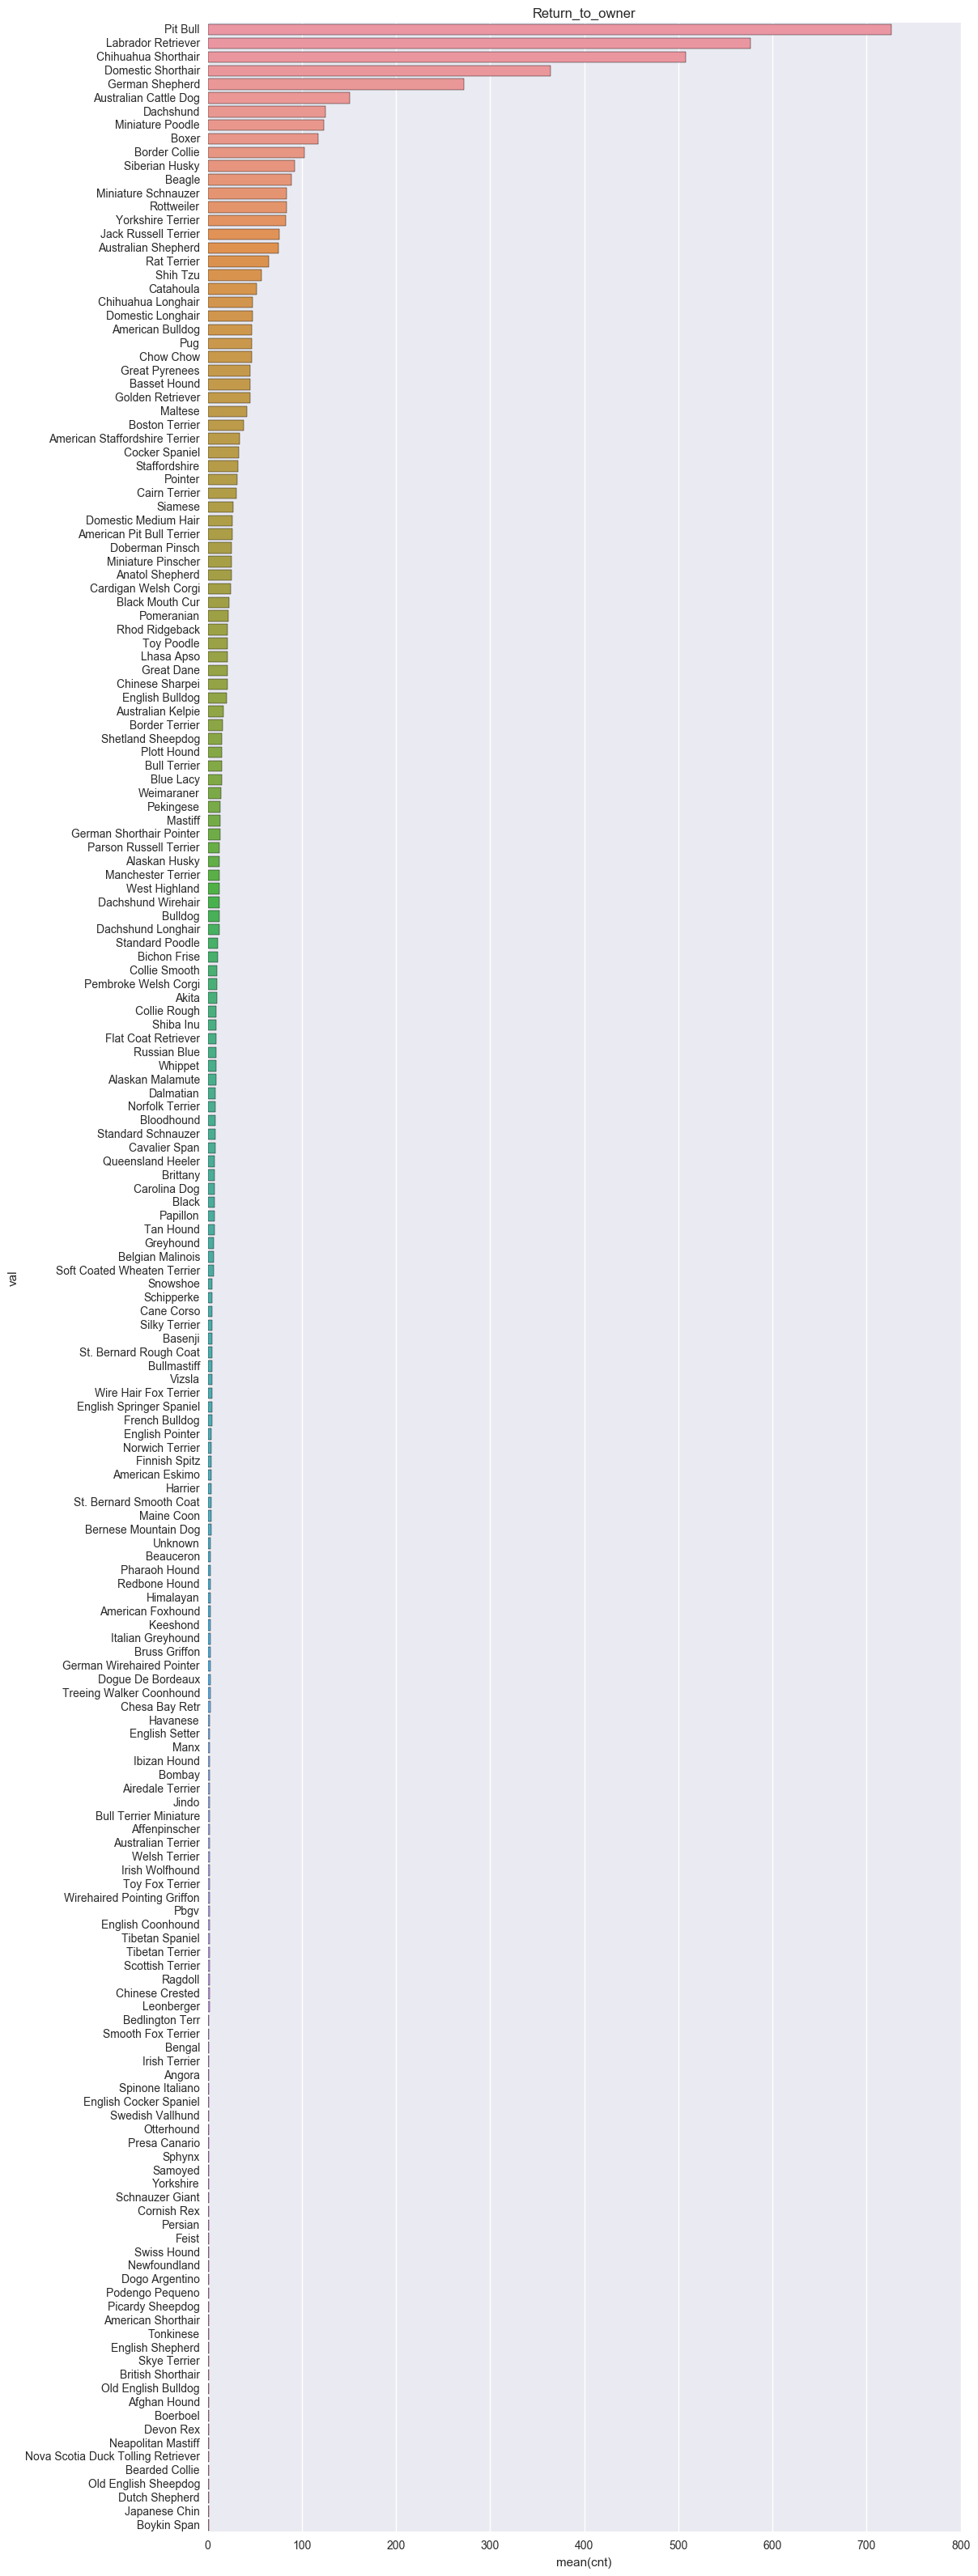

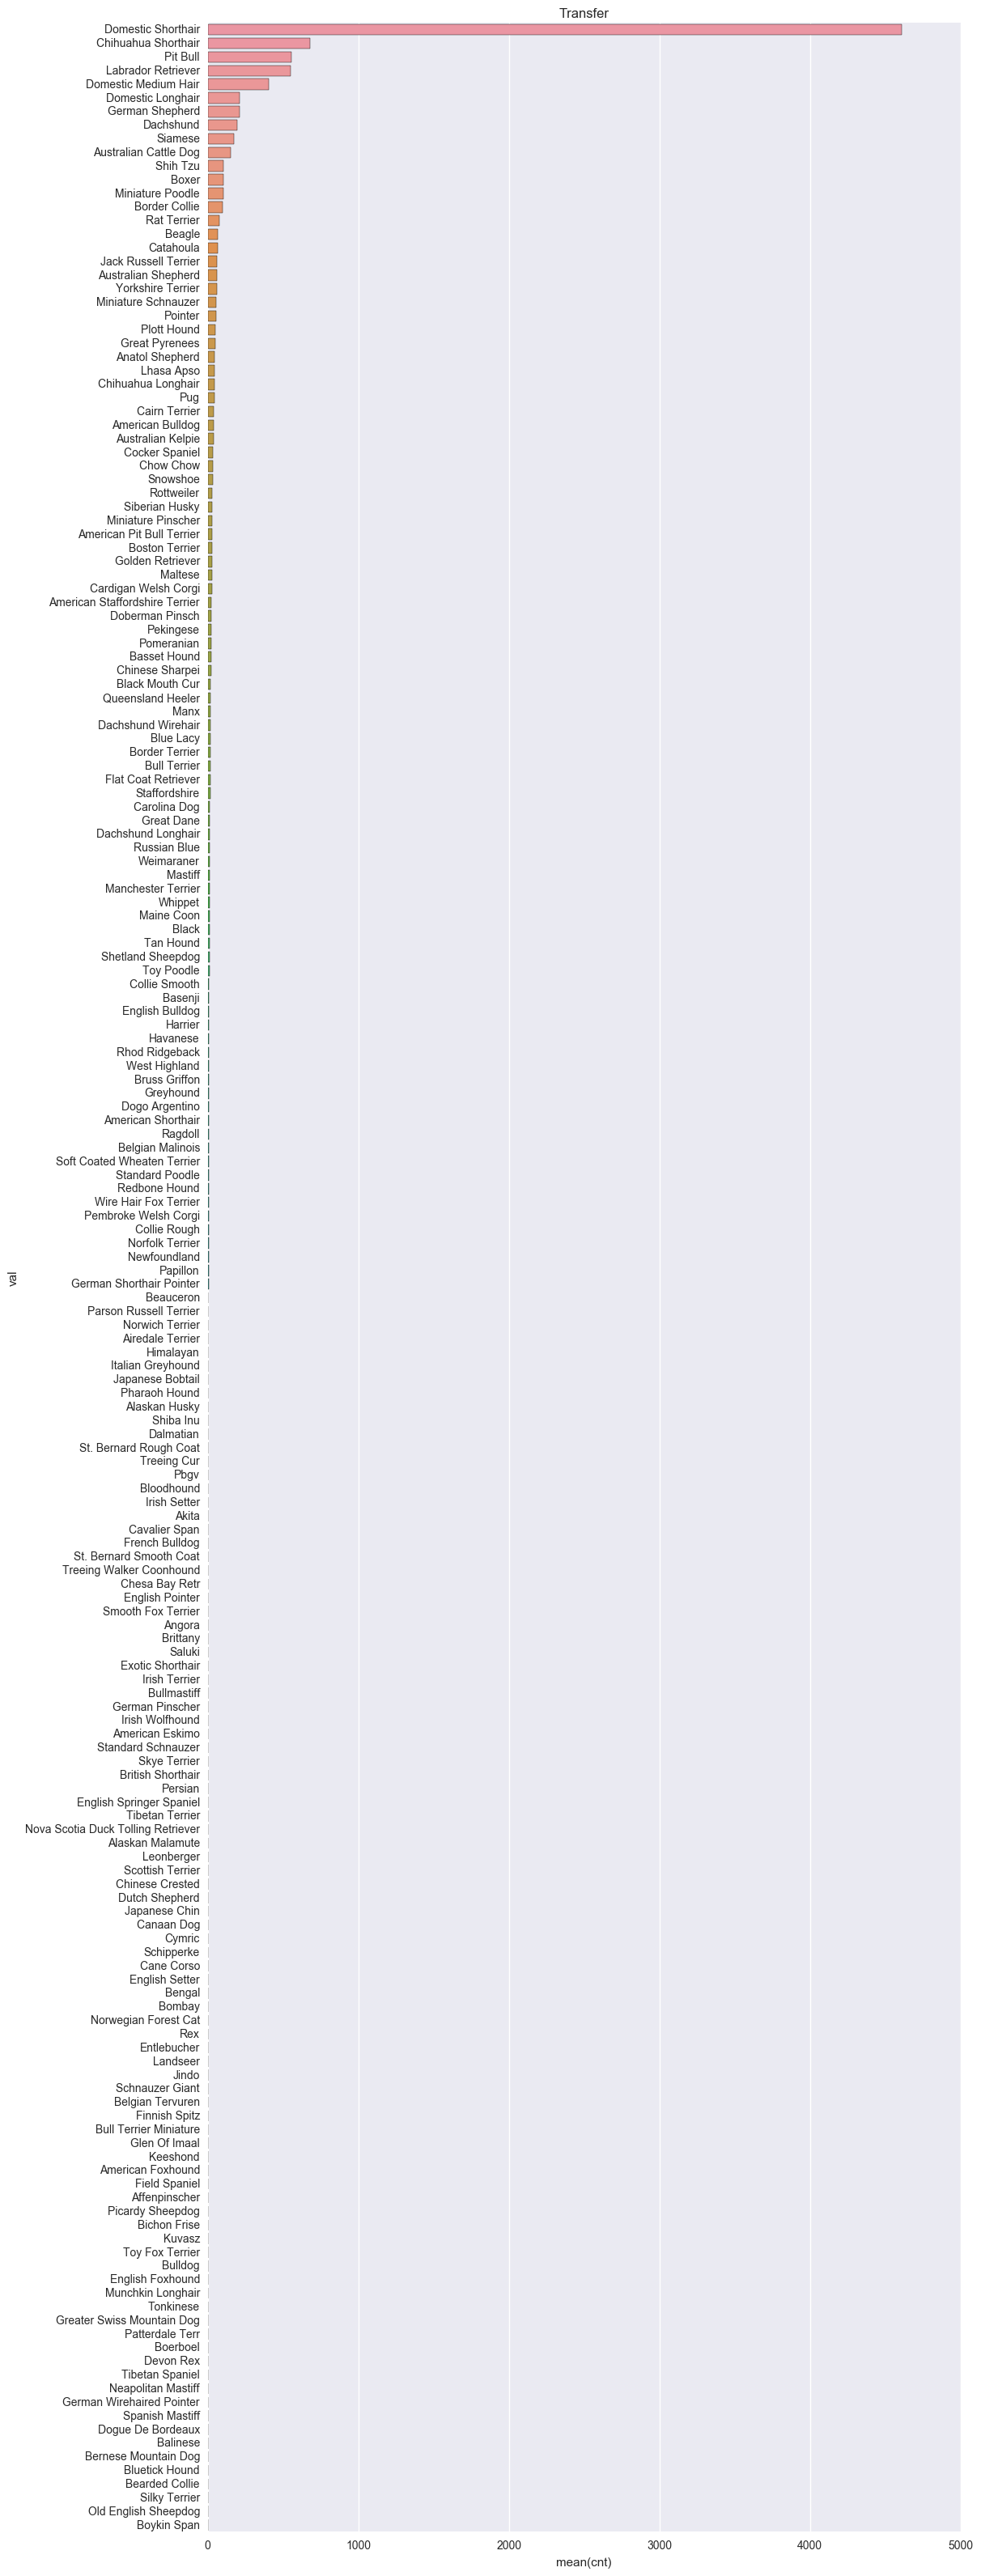

In [170]:
for i, df in enumerate( brdwrdcnt_df ):
    g = sns.barplot( data = df, x = 'cnt', y = 'val' )
    g.figure.set_size_inches( 12, 40 )
    g.set_title( outcome_types[i] )
    sns.plt.show()